In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=451ffdf5e2ca1720b2c727ad3ae0bdeae945af597a94e23022c03f091376219b
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
# for offline plotting
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/Stock Market/datasetsandcodefilesstockmarketprediction.zip' -d '/content'

Archive:  /content/drive/MyDrive/Stock Market/datasetsandcodefilesstockmarketprediction.zip
  inflating: /content/Google_train_data.csv  
  inflating: /content/Google_test_data.csv  
  inflating: /content/Google stock price.ipynb  
  inflating: /content/Tesla stock price prediction.ipynb  
  inflating: /content/tesla.csv      


In [5]:
tesla=pd.read_csv('/content/tesla.csv')
tesla.head(5)

Date       Open   High        Low      Close  Adj Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [6]:
tesla.info() # non null checking 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [7]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [8]:
print(tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-01-07
3      2010-02-07
4      2010-06-07
          ...    
2188   2019-11-03
2189   2019-12-03
2190   2019-03-13
2191   2019-03-14
2192   2019-03-15
Name: Date, Length: 2193, dtype: datetime64[ns]


In [9]:
print(f'Data frame contains stock pric between {tesla.Date.min()} {tesla.Date.max()}')

Data frame contains stock pric between 2010-01-07 00:00:00 2019-12-03 00:00:00


In [10]:
print(f'Total Days {tesla.Date.max() - tesla.Date.min()} days')

Total Days 3617 days 00:00:00 days


In [11]:
tesla.describe()

Open         High          Low        Close    Adj Close  \
count  2193.000000  2193.000000  2193.000000  2193.000000  2193.000000   
mean    175.652882   178.710262   172.412075   175.648555   175.648555   
std     115.580903   117.370092   113.654794   115.580771   115.580771   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      33.110001    33.910000    32.459999    33.160000    33.160000   
50%     204.990005   208.160004   201.669998   204.990005   204.990005   
75%     262.000000   265.329987   256.209991   261.739990   261.739990   
max     386.690002   389.609985   379.350006   385.000000   385.000000   

             Volume  
count  2.193000e+03  
mean   5.077449e+06  
std    4.545398e+06  
min    1.185000e+05  
25%    1.577800e+06  
50%    4.171700e+06  
75%    6.885600e+06  
max    3.716390e+07

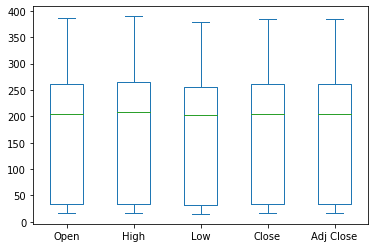

In [12]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [24]:
# setting the layout for plot 
layout =go.Layout(
    title='stock price of tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'


        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            #color='#7f7f7f'

        ))
)
tesla_data=[{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

In [16]:
#!pip install plotly

import plotly
import chart_studio.plotly as py
import plotly.offline as py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
iplot(plot)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tesla['Date'],tesla['Close'] , color='g')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("stock price of tesla'")
# Increase size of plot in jupyter
plt.rcParams["figure.figsize"] = (100,100)
# show the plot
plt.show()

In [28]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(tesla, x="Date", y="Close",
                 title="Using The add_trace() method With A Plotly Express Figure")

fig.add_trace(
    go.Scatter(
        x=tesla['Date'],
        y=tesla['Close'],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()